1. Importar todas las librerías necesarias. (+0.15 puntos)
2. Inicializar algunas variables que después modificaremos. (+0.15 puntos) texto en negrita


In [27]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = None
dataset =[]


3. Crear una función para generar los hostnames en base a unas reglas (+1.5 puntos)


In [3]:

def set_hostnames(number_of_hosts: int):

  hostnames= []
  counter = {}


  sis_op = ['L', 'S','A','H']
  sis_op_probab = [0.4, 0.3, 0.2, 0.1]

  entorno = ['D', 'I', 'T', 'S', 'P']
  entorno_probab = [0.1, 0.1, 0.25, 0.25, 0.3]

  paises = ['NOR', 'FRA', 'ITA', 'ESP', 'DEU', 'IRL']
  paises_probab = [0.06, 0.09, 0.16, 0.16, 0.23, 0.30]

  for x in range (number_of_hosts):

        x1 = random.choices(population = sis_op, weights= sis_op_probab, k=1)[0]
        x2 = random.choices(population = entorno, weights= entorno_probab, k=1)[0]
        x3 = random.choices(population = paises, weights= paises_probab, k=1)[0]

        key = (x1, x2, x3)
        if key in counter:
            counter[key] += 1
        else:
            counter[key] = 1

        x4 = f"{counter[key]:03d}"
        hostname = x1 + x2 + x3 + x4
        hostnames.append(hostname)


  return hostnames

for name in set_hostnames(8):
    print(name)



SPIRL001
LPDEU001
LTITA001
ASIRL001
LTIRL001
LPFRA001
APIRL001
SSDEU001


4. Crear una función para obtener el nombre del SO. (+0.5 puntos)


In [4]:
def get_os(hostname:str):
  if hostname[0] == 'L':
    return 'Linux'
  elif hostname[0] == 'S':
    return 'Solaris'
  elif hostname[0] == 'A':
    return 'AIX'
  elif hostname[0] == 'H':
    return 'HP-UX'

  else: return 'Unknown'






In [5]:
get_os('LTDEU001')

'Linux'

5. Crear una función para obtener el nombre del entorno. (+0.5 puntos)

In [6]:
def get_environment(hostname:str):
  if hostname[1] == 'D':
    return 'Development'
  elif hostname[1] == 'I':
    return 'Integration'
  elif hostname[1] == 'T':
    return 'Testing'
  elif hostname[1] == 'S':
    return 'Staging'
  elif hostname[1] == 'P':
    return 'Production'

  else: return 'Unknown'


In [7]:
get_environment('LTDEU001')

'Testing'

6. Crear una función para obtener el nombre del país. (+0.5 puntos)

In [8]:
def get_country(hostname:str):
  if hostname[2:5] == 'NOR':
    return 'Norway'
  elif hostname[2:5] == 'FRA':
    return 'France'
  elif hostname[2:5] == 'ITA':
    return 'Italy'
  elif hostname[2:5] == 'ESP':
    return 'Spain'
  elif hostname[2:5] == 'DEU':
    return 'Germany'
  elif hostname[2:5] == 'IRL':
    return 'Ireland'

  else: return 'Unknown'

In [11]:
get_country('LTDEU001')

'Germany'

7. Crear una función para generar el DataFrame. (+1 punto)

In [9]:
def set_dataframe(count:int):

  global df
  hostnames = set_hostnames(count)

  for name in hostnames:
    Dicc = {'hostname': name,
            'os' : get_os(name),
            'environment' : get_environment(name),
            'country': get_country(name),
            'node': int(name[5:])}

    dataset.append(Dicc)

  df = pd.DataFrame(dataset)

  df.to_csv("hosts.csv", index=False, header= True)







8. Crear el DataFrame. (+0.2 puntos)

In [10]:
set_dataframe(1500)
print(df)

      hostname       os  environment  country  node
0     ADIRL001      AIX  Development  Ireland     1
1     LIIRL001    Linux  Integration  Ireland     1
2     HTDEU001    HP-UX      Testing  Germany     1
3     LTDEU001    Linux      Testing  Germany     1
4     ATITA001      AIX      Testing    Italy     1
...        ...      ...          ...      ...   ...
1495  ASIRL025      AIX      Staging  Ireland    25
1496  SPITA025  Solaris   Production    Italy    25
1497  LTESP026    Linux      Testing    Spain    26
1498  ASIRL026      AIX      Staging  Ireland    26
1499  STITA021  Solaris      Testing    Italy    21

[1500 rows x 5 columns]


9. Guardar el DataFrame generado en un fichero CSV. (+0.5 puntos)

In [11]:
df_hosts = pd.read_csv("hosts.csv", encoding='utf-8', delimiter=',')

In [12]:
df_hosts

,hostname,os,environment,country,node
0,ADIRL001,AIX,Development,Ireland,1
1,LIIRL001,Linux,Integration,Ireland,1
2,HTDEU001,HP-UX,Testing,Germany,1
3,LTDEU001,Linux,Testing,Germany,1
4,ATITA001,AIX,Testing,Italy,1
...,...,...,...,...,...
1495,ASIRL025,AIX,Staging,Ireland,25
1496,SPITA025,Solaris,Production,Italy,25
1497,LTESP026,Linux,Testing,Spain,26
1498,ASIRL026,AIX,Staging,Ireland,26


10.Generar un único gráfico, agrupando para cada país (country) los
entornos (environment). (+0.5 puntos)
Se debe utilizar la función unstack y se debe generar un plot de tipo
barras (kind=bar). Debe quedar (más o menos) así:


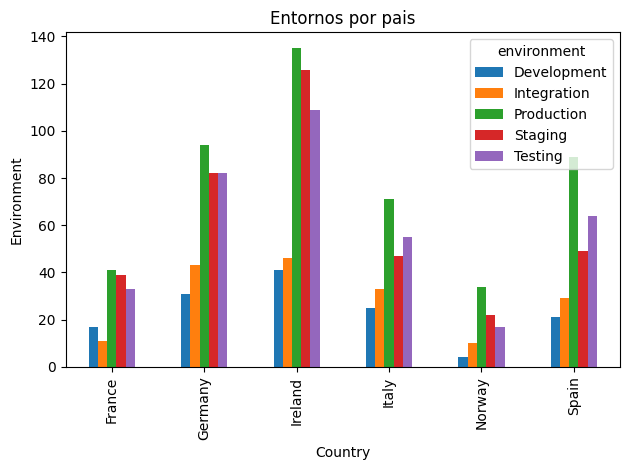

In [14]:
data = df_hosts.groupby(['country','environment']).size().unstack()
data.plot(kind="bar", title="Entornos por pais")
plt.xlabel('Country')
plt.ylabel('Environment')
plt.tight_layout()
plt.show()


11.Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas.
(+4.5 puntos)

En la esquina superior izquierda debe aparecer un gráfico cuyo
título sea Type of OS grouped by country. Debe ser un gráfico de
barras horizontales que representen una agrupación (groupby) por
cada país (country) de los sistemas operativos (os) que tiene. Se
debe utilizar la función unstack y el plot debe ser de tipo barras
horizontales (barh).

En la esquina superior derecha debe aparecer un gráfico cuyo
título sea Total Operating Systems. Debe representar la cantidad
total de sistemas operativos (os) que hay en el DataFrame. Se
debe utilizar la función groupby y el gráfico debe ser de tipo tarta
(pie). Como etiquetas (labels) debe mostrar el número de
sistemas operativos de cada tipo, y además debe mostrarse una
leyenda (legend) en la esquina superior derecha en la que
aparezca para cada sistema operativo el porcentaje existente en
el DataFrame.


En la esquina inferior izquierda debe aparecer un gráfico cuyo
título sea Total hosts by country. Debe ser un gráfico de barras
horizontales que representen la cantidad total de hosts por cada
país, para ello se debe utilizar la función value_counts() sobre los
países (country) del DataFrame. El gráfico generado debe incluir
como etiqueta en el eje x el texto Number of hosts y como etiqueta
del eje y el texto Country. También se ha de incluir el número total
de hosts que tiene cada país a la derecha de cada barra
horizontal. Además, se ha de añadir como valor máximo del eje x
un número equivalente al número total de hosts de la barra que
más host tenga +100, de este modo se verá un pequeño margen
a la derecha que hará que se visualice un poco mejor.
Opcionalmente se puede añadir con la librería seaborn una paleta
de colores (color_palette) que podemos utilizar para darle un
color degradado a las barras.


En la esquina inferior derecha debe aparecer un gráfico cuyo
título sea Hosts by country grouped by environment. Debe
representar una agrupación (groupby) de hosts que hay por cada
país (country) y entorno (environment). Se debe utilizar la función
unstack(0) y el plot debe ser de tipo barras (bar). Como etiqueta
del eje y se debe añadir el texto Number of hosts.
Finalmente se deben ajustar los márgenes y espacios entre los
gráficos (fig.tight_layout()).

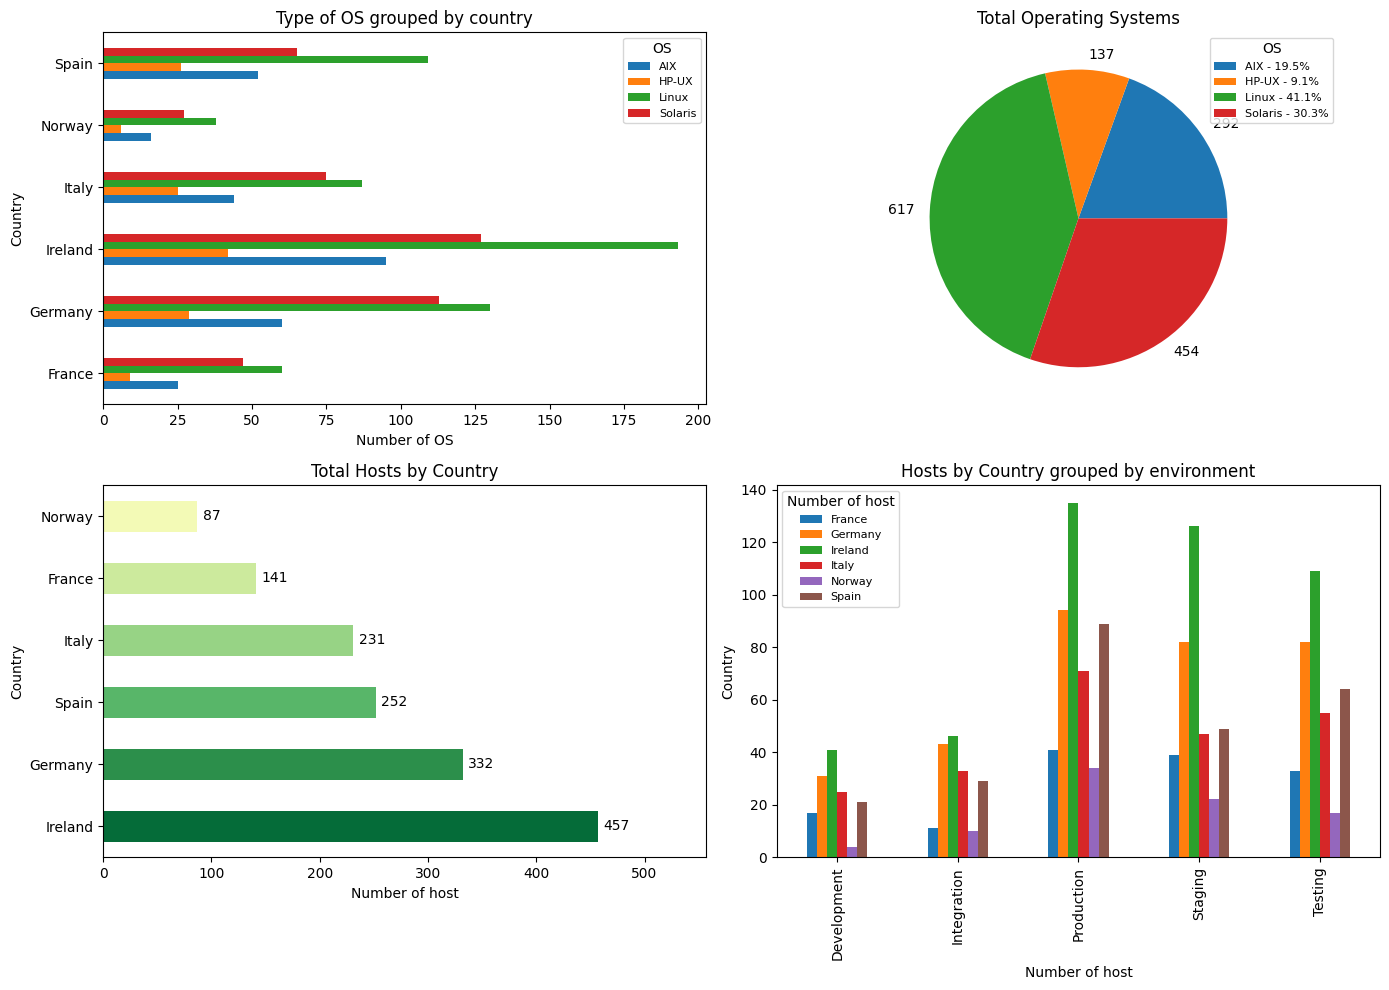

In [49]:
fig, axs = plt.subplots(2,2, figsize=(14, 10))


#0,0

data = df_hosts.groupby(['country','os']).size().unstack()
data.plot(kind="barh", ax=axs[0,0], title="Type of OS grouped by country")
axs[0, 0].set_xlabel("Number of OS")
axs[0, 0].set_ylabel("Country")
axs[0, 0].legend(title="OS",fontsize=8)


#0,1

os_count = df_hosts.groupby('os').size()
total= os_count.sum()
labels_with_percent = []
for os_name, count in os_count.items():
    percentage = count / total * 100
    label = f"{os_name} - {percentage:.1f}%"
    labels_with_percent.append(label)
axs[0, 1].pie(os_count, labels= os_count.values)
axs[0, 1].set_title("Total Operating Systems")
axs[0, 1].legend(labels_with_percent, title="OS", loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=8)


#1,0

host_count = df_hosts.groupby('country')['hostname'].count().sort_values(ascending=False)
host_count.plot(kind="barh", ax=axs[1, 0], title="Total Hosts by Country", color=sns.color_palette("YlGn_r", len(host_count)))
axs[1, 0].set_xlabel("Number of host")
axs[1, 0].set_ylabel("Country")
for bar in axs[1, 0].containers[0]:
    width = bar.get_width()
    label = f'{width:.0f}'
    axs[1, 0].text(width + 5, bar.get_y() + bar.get_height() / 2, label, va='center')
axs[1, 0].set_xlim(0, host_count.max() + 100)


#1,1

data = df_hosts.groupby(['environment', 'country'])['hostname'].count().unstack()
data.plot(kind="bar", ax=axs[1,1], title="Hosts by Country grouped by environment")
axs[1, 1].set_xlabel("Number of host")
axs[1, 1].set_ylabel("Country")
axs[1, 1].legend(title="Number of host",loc='upper left', fontsize=8)



plt.tight_layout()
plt.show()